# 03 Specialized Visualization 

- Pie Charts
- Box Plots
- Scatter Plots
- Bubble Plots

# Downloading and Preparing Data

In [1]:
import numpy as np
import pandas as pd

In [2]:
df_can = pd.read_excel('https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/DV0101EN/labs/Data_Files/Canada.xlsx',
                       sheet_name='Canada by Citizenship',
                       skiprows=range(20),
                       skipfooter=2
                      )

In [3]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [4]:
df_can.shape

(195, 43)

## Clean up data
>make modifications to the original dataset to create the visualizations.

### 1. Remove columns
>Clean up the dataset to remove columns that are not informative to us for visualization (Type, AREA, REG. DEV, Coverage)

In [5]:
df_can.drop(['AREA', 'REG', 'DEV', 'Type', 'Coverage'], axis=1, inplace=True)
df_can.head()

,OdName,AreaName,RegName,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


In [6]:
df_can.shape

(195, 38)

### 2. Rename columns 

In [7]:
df_can.rename(columns={'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace=True)
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1450,1223,856,702,560,716,561,539,620,603
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,0,1,1,0,0,0,0,1,1


### 3. Convert column labels type to string

In [8]:
df_can.columns = list(map(str, df_can.columns))

In [9]:
all(isinstance(column, str) for column in df_can.columns)

True

### 4. Set country name as index
>for quickly looking up countries using .loc method.

In [10]:
df_can.set_index('Country', inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1450,1223,856,702,560,716,561,539,620,603
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,0,1,1,0,0,0,0,1,1


### 5. Add total column

In [11]:
df_can['Total'] = df_can.sum(axis=1)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


In [12]:
print (f'data dimensions: {df_can.shape}')

data dimensions: (195, 38)


### 6. Create a list of years from 1980 - 2013
> used for plotting the data

In [13]:
years = list(map(str, range(1980, 2014)))
years[:5]

['1980', '1981', '1982', '1983', '1984']

# Pie Charts

>circualr graphic that displays numeric proportions by dividing a circle (or pie) into proportional slices.

In [14]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 
import matplotlib.pyplot as plt

## Explore new immigrants percentage by continents 1980 - 2013.
>explore the proportion (percentage) of new immigrants grouped by continents for the entire time period from 1980 to 2013.

### Step 1: Gather data. 

Use *pandas* `groupby` method to summarize the immigration data by `Continent`. 

1. **Split:** Splitting the data into groups based on some criteria.
2. **Apply:** Applying a function to each group independently:
       .sum()
       .count()
       .mean() 
       .std() 
       .aggregate()
       .apply()
       .etc..
3. **Combine:** Combining the results into a data structure.

![](../images/split_apply_combine.png)

In [15]:
# group countries by continents and apply sum() function 
df_continents = df_can.groupby('Continent', axis=0).sum()

print(type(df_can.groupby('Continent', axis=0)))

df_continents

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


### Step 2: Plot the data

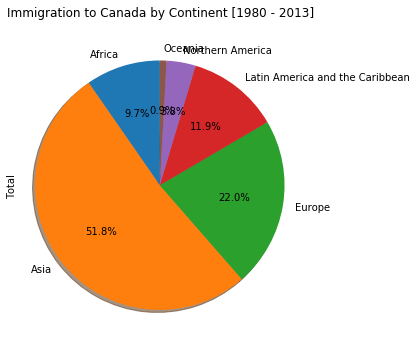

In [16]:
# autopct create %, start angle represent starting point
df_continents['Total'].plot(kind='pie',
                            figsize=(5, 6),
                            autopct='%1.1f%%', # add in percentages
                            startangle=90,     # start angle 90° (Africa)
                            shadow=True,       # add shadow      
                            )

plt.title('Immigration to Canada by Continent [1980 - 2013]')
plt.axis('equal') # Sets the pie chart to look like a circle.

plt.show()

## Make  modifications to improve the visuals

- Remove the text labels on the pie chart by passing in legend and add it as a seperate legend using plt.legend().
- Push out the percentages to sit just outside the pie chart by passing in pctdistance parameter.
- Pass in a custom set of colors for continents by passing in colors parameter.
- Explode the pie chart to emphasize the lowest three continents (Africa, North America, and Latin America and Carribbean) by pasing in explode parameter.

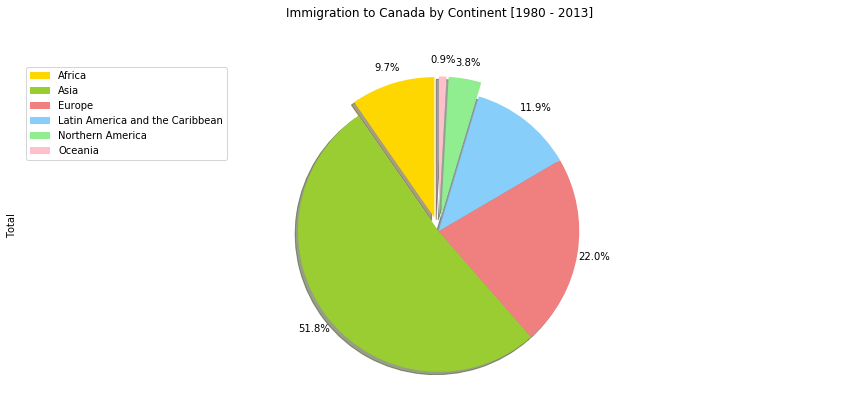

In [17]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# save plot
plt.savefig('../figs/03_Specialized/immigration_by_continent_2013_2015_pie.png')

plt.show()

## Explore new immigrants percentage by continents in 2013
>explore the proportion (percentage) of new immigrants grouped by continents in the year 2013.

In [18]:
df_continents = df_can.groupby('Continent', axis=0).sum()
df_continents_2013 = df_continents['2013']
df_continents_2013

Continent
Africa                              38543
Asia                               155075
Europe                              28691
Latin America and the Caribbean     24950
Northern America                     8503
Oceania                              1775
Name: 2013, dtype: int64

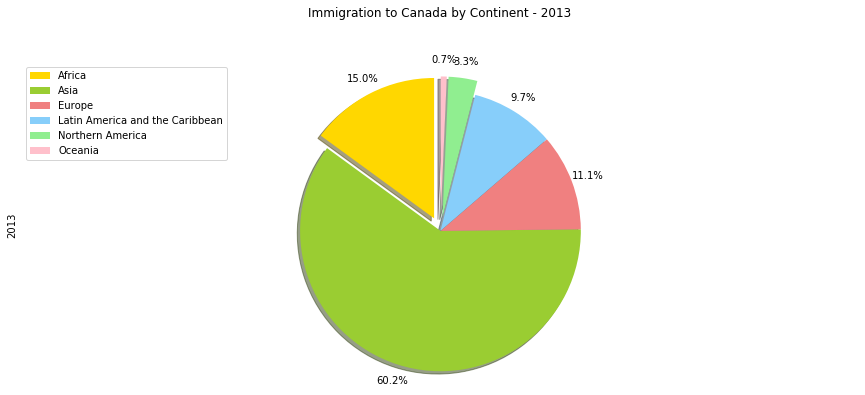

In [19]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.1, 0.1] # ratio for each continent with which to offset each wedge.

df_continents_2013.plot(kind='pie',
                            figsize=(15, 6),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode=explode_list # 'explode' lowest 3 continents
                            )

# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent - 2013', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

# save plot
plt.savefig('../figs/03_Specialized/immigration_by_continent_2013_pie.png')

plt.show()

# Box Plots

>way of statistically representing the distribution of the data through five main dimensions:

- **Minimun**: Smallest number in the dataset.
- **First quartile**: Middle number between the minimum and the median.
- **Second quartile (Median)**: Middle number of the (sorted) dataset.
- **Third quartile**: Middle number between median and maximum.
- **Maximum**: Highest number in the dataset.

![](../images/boxplot_dimensions.png)

## Japanese immigrants box plot
>plot the box plot for the Japanese immigrants between 1980 - 2013

### Step 1: Get the dataset
>extracting the data for just one country
>call the dataframe.describe() method to view the percentiles.

In [20]:
# to get a dataframe, place extra square brackets around 'Japan'.
df_japan = df_can.loc[['Japan'], years].transpose()
df_japan.head()

Country,Japan
1980,701
1981,756
1982,598
1983,309
1984,246


### Step 2: Plot by passing in kind='box'

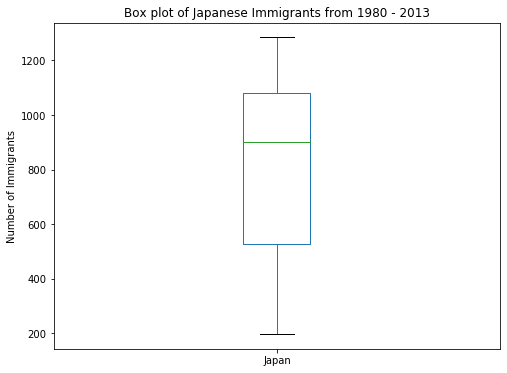

In [21]:
df_japan.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Japanese Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')
plt.savefig('../figs/03_Specialized/immigration_japan_boxplot.png')
plt.show()

>Make a few key observations from the plot above:
- The minimum number of immigrants is around 200 (min), maximum number is around 1300 (max), and median number of immigrants is around 900 (median).
- 25% of the years for period 1980 - 2013 had an annual immigrant count of ~500 or fewer (First quartile).
- 75% of the years for period 1980 - 2013 had an annual immigrant count of ~1100 or fewer (Third quartile).

In [22]:
# view the actual numbers by calling the describe() method on the dataframe.
df_japan.describe()

Country,Japan
count,34.000000
mean,814.911765
std,337.219771
min,198.000000
25%,529.000000
50%,902.000000
75%,1079.000000
max,1284.000000


## Compare new immigrants from India and China 
>Compare the distribution of the number of new immigrants from India and China for the period 1980 - 2013.

### Step 1: Get the dataset for China and India and call the dataframe df_CI.

In [23]:
df_CI = df_can.loc[['China','India'], years].transpose()
df_CI.head()

Country,China,India
1980,5123,8880
1981,6682,8670
1982,3308,8147
1983,1863,7338
1984,1527,5704


### Step 2: Plot data

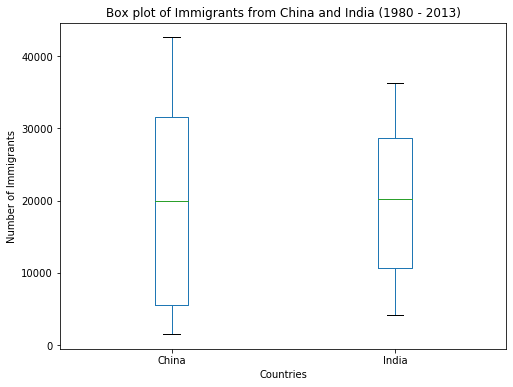

In [24]:
df_CI.plot(kind='box', figsize=(8, 6))

plt.title('Box plot of Immigrants from China and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')
plt.xlabel('Countries')

plt.savefig('../figs/03_Specialized/immigration_china_india_boxplot.png')

plt.show()

>Both countries have around the same median immigrant population (~20,000)

>China's immigrant population range is more spread out than India's. 

>The maximum population from India for any year (36,210) is around 15% lower than the maximum population from China (42,584).

### Create horizontal box plots
> pass the vert parameter in the plot function and 
assign it to False. 
- specify a different color instead of the default red color.

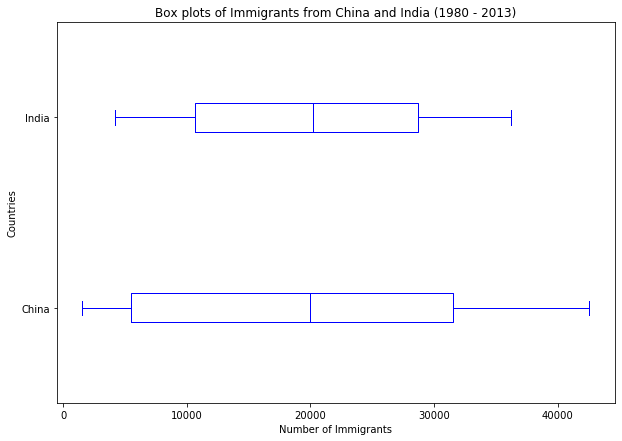

In [25]:
# horizontal box plots
df_CI.plot(kind='box', figsize=(10, 7), color='blue', vert=False)

plt.title('Box plots of Immigrants from China and India (1980 - 2013)')
plt.xlabel('Number of Immigrants')
plt.ylabel('Countries')

plt.savefig('../figs/03_Specialized/immigration_china_india_boxploth.png')

plt.show()

## Subplots

> plot multiple plots within the same figure

### Perform a side by side comparison of the box plot with the line plot of China and India's immigration.

>To visualize multiple plots together, we can create a figure (overall canvas) and divide it into subplots, each containing a plot. 

>With subplots, we usually work with the artist layer instead of the scripting layer.

![](../images/subplots.png)

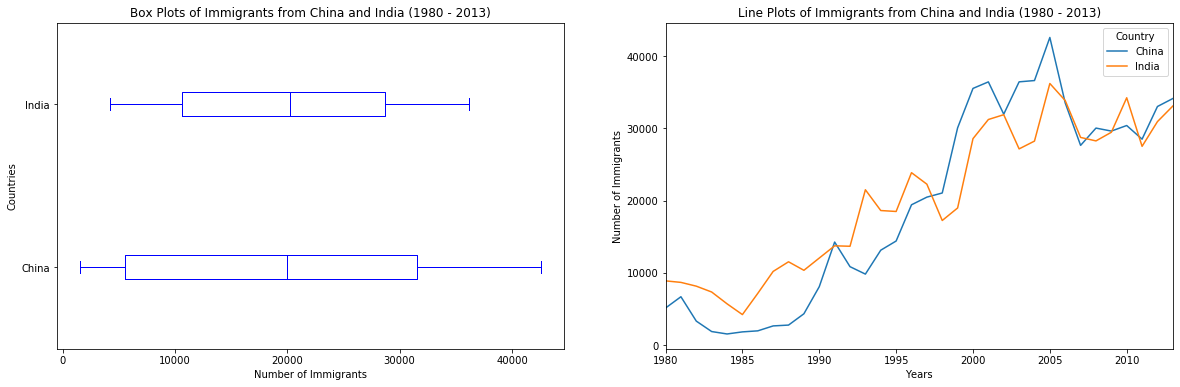

In [26]:
fig = plt.figure() # create figure

# add subplot 1 (1 row, 2 columns, first plot)
ax0 = fig.add_subplot(1, 2, 1) 

# add subplot 2 (1 row, 2 columns, second plot). See tip below**
ax1 = fig.add_subplot(1, 2, 2) 

# Subplot 1: Box plot
df_CI.plot(kind='box', color='blue', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box Plots of Immigrants from China and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')

# Subplot 2: Line plot
df_CI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
ax1.set_title ('Line Plots of Immigrants from China and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.savefig('../figs/03_Specialized/immigration_china_india_subplots.png')

plt.show()

### Create a box plot to visualize top 15 countries by decades
>Create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

### Step 1: Get the dataset
>Get the top 15 countries based on Total immigrant population. 

>Name the dataframe df_top15.

In [27]:
df_can.sort_values(by='Total', ascending=False, inplace=True)

df_top15 = df_can['Total'].head(15)
df_top15

Country
India                                                   691904
China                                                   659962
United Kingdom of Great Britain and Northern Ireland    551500
Philippines                                             511391
Pakistan                                                241600
United States of America                                241122
Iran (Islamic Republic of)                              175923
Sri Lanka                                               148358
Republic of Korea                                       142581
Poland                                                  139241
Lebanon                                                 115359
France                                                  109091
Jamaica                                                 106431
Viet Nam                                                 97146
Romania                                                  93585
Name: Total, dtype: int64

In [28]:
df_top15.index

Index(['India', 'China',
       'United Kingdom of Great Britain and Northern Ireland', 'Philippines',
       'Pakistan', 'United States of America', 'Iran (Islamic Republic of)',
       'Sri Lanka', 'Republic of Korea', 'Poland', 'Lebanon', 'France',
       'Jamaica', 'Viet Nam', 'Romania'],
      dtype='object', name='Country')

### Step 2: Create a new dataframe which contains the aggregate for each decade

1. Create a list of all years in decades 80's, 90's, and 00's.
2. Slice the original dataframe df_can to create a series for each decade and sum across all years for each country.
3. Merge the three series into a new data frame. Call your dataframe new_df

In [29]:
# create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_80s[:5]

['1980', '1981', '1982', '1983', '1984']

In [30]:
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

In [31]:
# slice the original dataframe df_can to create a series for each decade
# df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_80s = df_can.loc[df_top15.index, years_80s]
df_80s

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989
Country,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790
Iran (Islamic Republic of),1172,1429,1822,1592,1977,1648,1794,2989,3273,3781
Sri Lanka,185,371,290,197,1086,845,1838,4447,2779,2758
Republic of Korea,1011,1456,1572,1081,847,962,1208,2338,2805,2979


In [32]:
# slice the original dataframe df_can to create a series for each decade 
# sum across all years for each country
df_80s = df_can.loc[df_top15.index, years_80s].sum(axis=1)
df_80s

Country
India                                                    82154
China                                                    32003
United Kingdom of Great Britain and Northern Ireland    179171
Philippines                                              60764
Pakistan                                                 10591
United States of America                                 76824
Iran (Islamic Republic of)                               21477
Sri Lanka                                                14796
Republic of Korea                                        16259
Poland                                                   57602
Lebanon                                                  24918
France                                                   17137
Jamaica                                                  34328
Viet Nam                                                 30638
Romania                                                   7613
dtype: int64

In [33]:
df_90s = df_can.loc[df_top15.index, years_90s].sum(axis=1)
df_00s = df_can.loc[df_top15.index, years_00s].sum(axis=1)

In [34]:
# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

In [35]:
# display dataframe
new_df

,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598
United States of America,76824,56915,75173
Iran (Islamic Republic of),21477,54871,65794
Sri Lanka,14796,70421,49678
Republic of Korea,16259,38189,68183


In [36]:
# new_df statistics
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


### Step 3: Plot the box plots

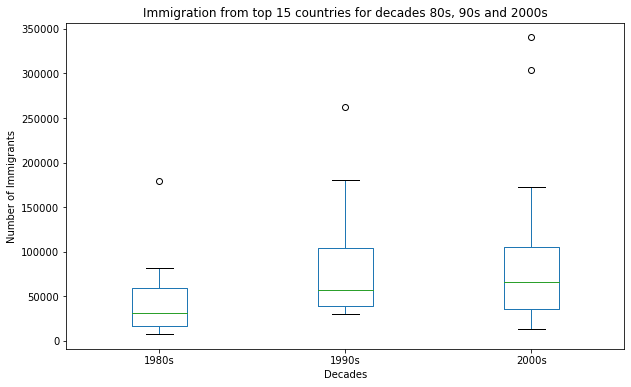

In [37]:
new_df.plot(kind='box', figsize=(10, 6))

plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.xlabel('Decades')
plt.ylabel('Number of Immigrants')

plt.savefig('../figs/03_Specialized/immigration_top15_box.png')

plt.show()

>Box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:
- larger than Q3 by at least 1.5 times the interquartile range (IQR), or,
- smaller than Q1 by at least 1.5 times the IQR.

>Decade 2000s as an example:
- Q1 (25%) = 36,101.5
- Q3 (75%) = 105,505.5
- IQR = Q3 - Q1 = 69,404

>Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.
- Outlier > 105,505.5 + (1.5 * 69,404)
- Outlier > 209,611.5

# Scatter Plots

> a type of plot that displays values pertaining to typically two variables against each other. 

>Usually it is a dependent variable to be plotted against an independent variable in order to determine if any correlation between the two variables exists.

## Visualize Total immigrantion to Canada 1980 - 2013
>Visualize the trend of total immigrantion to Canada (all countries combined) for the years 1980 - 2013.

### Step 1: Get the dataset
>convert years to int type to use the relationship betewen years and total population 

In [38]:
df_can[years].head()

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
India,8880,8670,8147,7338,5704,4211,7150,10189,11522,10343,...,28235,36210,33848,28742,28261,29456,34235,27509,30933,33087
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
Philippines,6051,5921,5249,4562,3801,3150,4166,7360,8639,11865,...,14004,18139,18400,19837,24887,28573,38617,36765,34315,29544
Pakistan,978,972,1201,900,668,514,691,1072,1334,2261,...,13399,14314,13127,10124,8994,7217,6811,7468,11227,12603


In [39]:
df_can[years].sum(axis=0).head()

1980     99137
1981    110563
1982    104271
1983     75550
1984     73417
dtype: int64

In [40]:
# get the total population per year
df_tot = pd.DataFrame(df_can[years].sum(axis=0))
df_tot.head()

,0
1980,99137
1981,110563
1982,104271
1983,75550
1984,73417


In [41]:
df_tot.columns 

RangeIndex(start=0, stop=1, step=1)

In [42]:
# change the years to type int
df_tot.index = map(int, df_tot.index)
df_tot.index 

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

In [43]:
# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

In [44]:
# rename columns
df_tot.columns = ['year', 'total']
df_tot.columns 

Index(['year', 'total'], dtype='object')

In [45]:
# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


### Step 2: Plot the data
>Create a scatter plot set by passing in kind='scatter' as plot argument.

>pass in x and y keywords to specify the columns that go on the x- and the y-axis.

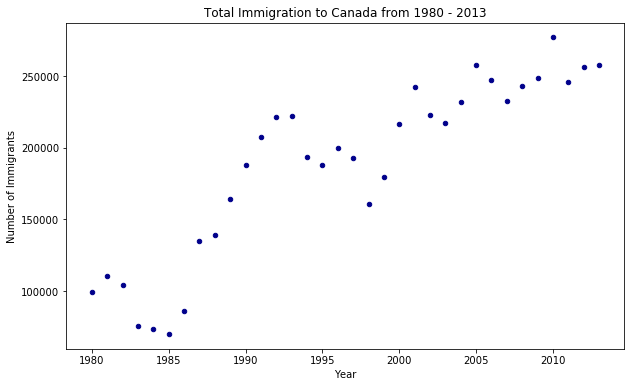

In [46]:
df_tot.plot(kind='scatter', 
            x='year', 
            y='total', 
            figsize=(10, 6), 
            color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

>The scatter plot does not connect the datapoints together. 

> observe an upward trend in the data: as the years go by, the total number of immigrants increases. 

>We can mathematically analyze this upward trend using a regression line (line of best fit).

## Plot linear line of best fit
>plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

### Step 1: Get the equation of line of best fit. 
> use Numpy's polyfit() method by passing in the following:
- x: x-coordinates of the data.
- y: y-coordinates of the data.
- deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

In [47]:
x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)
fit

array([ 5.56709228e+03, -1.09261952e+07])

>The output is an array with the polynomial coefficients, highest powers first. 

>Since we are plotting a linear regression y= a*x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] 

>with the the slope in position 0 and intercept in position 1.

### Step 2: Plot the regression line on the scatter plot

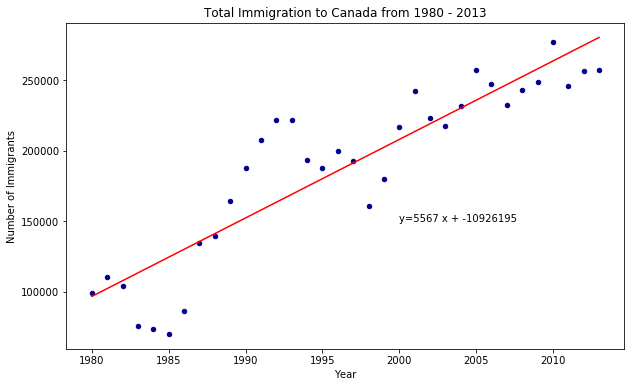

In [48]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate(f'y={fit[0]:.0f} x + {fit[1]:.0f}', xy=(2000, 150000))

# save plot
plt.savefig('../figs/03_Specialized/immigration_best_fit_scatter.png')

# show plot
plt.show()

In [49]:
# print out the line of best fit
f'No. Immigrants = {fit[0]:.0f} * Year + {fit[1]:.0f}'

'No. Immigrants = 5567 * Year + -10926195'

Using the equation of line of best fit, we can estimate the number of immigrants in 2015:

- No. Immigrants = 5567 * Year - 10926195
- No. Immigrants = 5567 * 2015 - 10926195
- No. Immigrants = 291,310

When compared to the actuals from Citizenship and Immigration Canada's (CIC) 2016 Annual Report, we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations (and might differ slightly from CIC data).

## Create a scatter plot of immigration from Denmark, Norway, and Sweden 
> Create a scatter plot of the total immigration from Denmark, Norway, and Sweden to Canada from 1980 to 2013?

### Step 1: Get the data:

1. Create a dataframe the consists of the numbers associated with Denmark, Norway, and Sweden only. Name it df_countries.
2. Sum the immigration numbers across all three countries for each year and turn the result into a dataframe. Name this new dataframe df_total.
3. Reset the index in place.
4. Rename the columns to year and total.
5. Display the resulting dataframe.

In [50]:
# create df_countries dataframe
df_countries = df_can.loc[['Denmark', 'Norway', 'Sweden'], years].transpose()
df_countries.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


In [51]:
# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))
df_total.head()

,0
1980,669
1981,678
1982,627
1983,333
1984,252


In [52]:
# reset index in place
df_total.reset_index(inplace=True)

In [53]:
# rename columns
df_total.columns = ['year', 'total']
df_total.columns

Index(['year', 'total'], dtype='object')

In [54]:
# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)
df_total['year'].head()

0    1980
1    1981
2    1982
3    1983
4    1984
Name: year, dtype: int64

In [55]:
# show resulting dataframe
df_total.head()

,year,total
0,1980,669
1,1981,678
2,1982,627
3,1983,333
4,1984,252


### Step 2: Generate the scatter plot by plotting the total versus year in df_total.

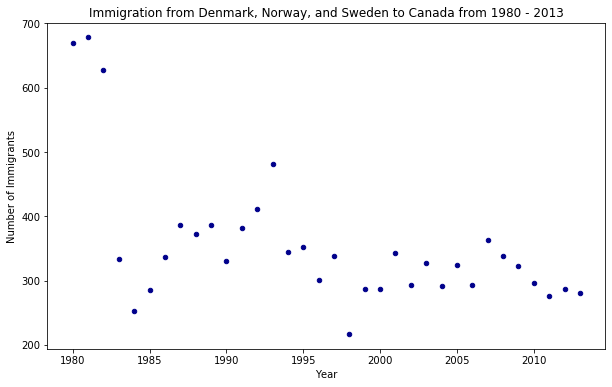

In [56]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(10, 6), color='darkblue')

# add title and label to axes
plt.title('Immigration from Denmark, Norway, and Sweden to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# save plot
plt.savefig('../figs/03_Specialized/immigration_from_denmark_norway_sweden_scatter.png')

# show plot
plt.show()

# Bubble Plots

>bubble plot is a variation of the scatter plot that displays three dimensions of data (x, y, z). 

>The datapoints are replaced with bubbles, and the size of the bubble is determined by the third variable 'z', also known as the weight. 

>In maplotlib, we can pass in an array or scalar to the keyword s to plot(), that contains the weight of each point.

## Analyzing the effect of Argentina's great depression.

>Argentina suffered a great depression from 1998 - 2002

>Compare Argentina's immigration to that of it's neighbour Brazil. 

>Using a bubble plot of immigration from Brazil and Argentina for the years 1980 - 2013. 

>Set the weights for the bubble as the normalized value of the population for each year.

### Step 1: Get the data for Brazil and Argentina.
>convert the Years to type int and bring it in the dataframe.

In [57]:
df_can_t = df_can[years].transpose() # transposed dataframe
df_can_t.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,Poland,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
1980,8880,5123,22045,6051,978,9378,1172,185,1011,863,...,0,0,0,0,0,1,0,0,0,0
1981,8670,6682,24796,5921,972,10030,1429,371,1456,2930,...,0,0,0,1,1,0,0,0,0,0
1982,8147,3308,20620,5249,1201,9074,1822,290,1572,5881,...,0,0,0,0,0,0,0,0,0,0
1983,7338,1863,10015,4562,900,7100,1592,197,1081,4546,...,1,0,0,0,0,0,0,0,0,0
1984,5704,1527,10170,3801,668,6661,1977,1086,847,3588,...,0,0,0,1,0,0,0,0,0,0


In [58]:
# cast the Years (the index) to type int
df_can_t.index = map(int, df_can_t.index)
df_can_t.index

Int64Index([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
            1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
            2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
            2013],
           dtype='int64')

In [59]:
# label the index. 
#This will automatically be the column name when we reset the index
df_can_t.index.name = 'Year'
df_can_t.index.name

'Year'

In [60]:
# reset index to bring the Year in as a column
df_can_t.reset_index(inplace=True)

In [61]:
# view the changes
df_can_t.head()

Country,Year,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan,United States of America,Iran (Islamic Republic of),Sri Lanka,Republic of Korea,...,Kiribati,Vanuatu,Sao Tome and Principe,Tuvalu,American Samoa,San Marino,New Caledonia,Marshall Islands,Western Sahara,Palau
0,1980,8880,5123,22045,6051,978,9378,1172,185,1011,...,0,0,0,0,0,1,0,0,0,0
1,1981,8670,6682,24796,5921,972,10030,1429,371,1456,...,0,0,0,1,1,0,0,0,0,0
2,1982,8147,3308,20620,5249,1201,9074,1822,290,1572,...,0,0,0,0,0,0,0,0,0,0
3,1983,7338,1863,10015,4562,900,7100,1592,197,1081,...,1,0,0,0,0,0,0,0,0,0
4,1984,5704,1527,10170,3801,668,6661,1977,1086,847,...,0,0,0,1,0,0,0,0,0,0


### Step 2: Create the normalized weights

>use feature scaling method of normalization to bring all values into the range [0,1]. 
The general formula is:

$$ X{'} = \frac{X - X_{min}}{X_{max} - X_{min}} $$

>where X is an original value, X' is the normalized value. 

>The formula sets the max value in the dataset to 1, and sets the min value to 0. 

>The rest of the datapoints are scaled to a value between 0-1 accordingly.

In [62]:
# normalize Brazil data
norm_brazil = (df_can_t['Brazil'] - df_can_t['Brazil'].min()) / (df_can_t['Brazil'].max() - df_can_t['Brazil'].min())
norm_brazil.head()

0    0.032820
1    0.036467
2    0.025122
3    0.003647
4    0.006078
Name: Brazil, dtype: float64

In [63]:
# normalize Argentina data
norm_argentina = (df_can_t['Argentina'] - df_can_t['Argentina'].min()) / (df_can_t['Argentina'].max() - df_can_t['Argentina'].min())
norm_argentina.head()

0    0.111039
1    0.148483
2    0.277598
3    0.029051
4    0.026469
Name: Argentina, dtype: float64

## Step 3: Plot the data

> plot two different scatter plots in one plot, 

>include the axes one plot into the other by passing it via the ax parameter.

>pass in the weights using the s parameter. 

>Given that the normalized weights are between 0-1, they won't be visible on the plot. 

>Multiply weights by 2000 to scale it up on the graph, and,
add 10 to compensate for the min value (which has a 0 weight and therefore scale with x2000).

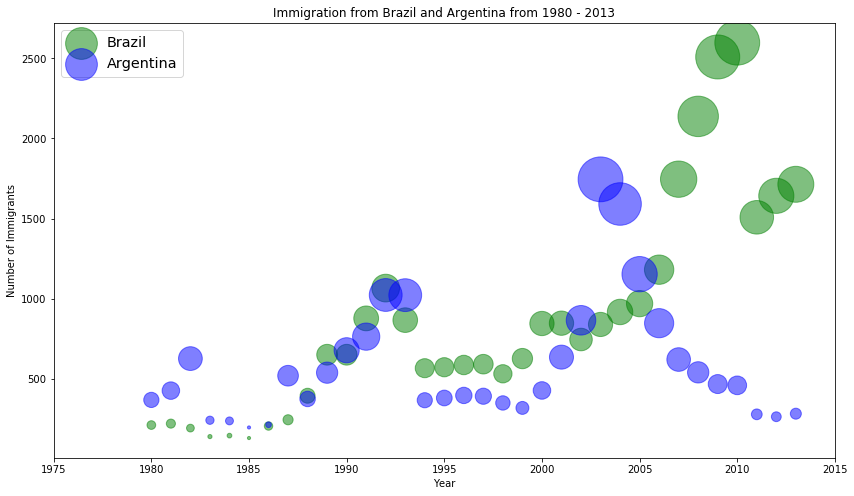

In [64]:
# Brazil
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Brazil',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_brazil * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )

# Argentina
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='Argentina',
                    alpha=0.5,
                    color="blue",
                    s=norm_argentina * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Brazil and Argentina from 1980 - 2013')
ax0.legend(['Brazil', 'Argentina'], loc='upper left', fontsize='x-large')

# save plot
plt.savefig('../figs/03_Specialized/immigration_from_brazil_argentina_bubble.png')

>The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble, the more immigrants in that year.

>See a corresponding increase in immigration from Argentina during the 1998 - 2002 great depression. 

>Observe a similar spike around 1985 to 1993. In fact, Argentina had suffered a great depression from 1974 - 1990, just before the onset of 1998 - 2002 great depression.

>Brazil suffered the Samba Effect where the Brazilian real (currency) dropped nearly 35% in 1999. 

>There was a fear of a South American financial crisis as many South American countries were heavily dependent on industrial exports from Brazil. 

>The Brazilian government subsequently adopted an austerity program, and the economy slowly recovered over the years, culminating in a surge in 2010. 

>The immigration data reflect these events.

## Create bubble plots of immigration from China and India 
> Create bubble plots of immigration from China and India to visualize any differences with time from 1980 to 2013. 

### Step 1: Normalize the data pertaining to China and India.

In [65]:
# normalize China data
norm_china = (df_can_t['China'] - df_can_t['China'].min()) / (df_can_t['China'].max() - df_can_t['China'].min())
norm_china.head()

0    0.087586
1    0.125557
2    0.043379
3    0.008184
4    0.000000
Name: China, dtype: float64

In [66]:
# normalize India data
norm_india = (df_can_t['India'] - df_can_t['India'].min()) / (df_can_t['India'].max() - df_can_t['India'].min())
norm_india.head()

0    0.145911
1    0.139348
2    0.123004
3    0.097722
4    0.046658
Name: India, dtype: float64

### Step 2: Generate the bubble plots.

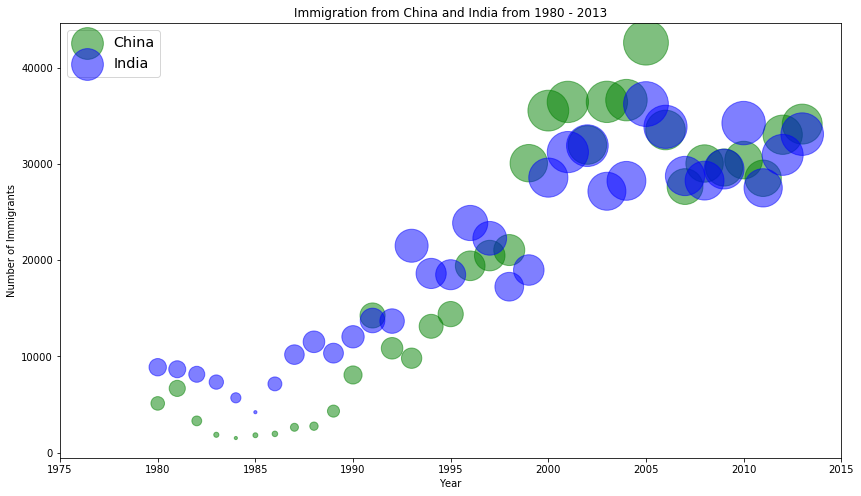

In [67]:
# China
ax0 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='China',
                    figsize=(14, 8),
                    alpha=0.5,                  # transparency
                    color='green',
                    s=norm_china * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                   )
# India
ax1 = df_can_t.plot(kind='scatter',
                    x='Year',
                    y='India',
                    alpha=0.5,
                    color="blue",
                    s=norm_india * 2000 + 10,
                    ax = ax0
                   )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from China and India from 1980 - 2013')
ax0.legend(['China', 'India'], loc='upper left', fontsize='x-large')

# save plot
plt.savefig('../figs/03_Specialized/immigration_from_china_india_bubble.png')